In [8]:
import gym
import gym_pdw

import numpy as np
from matplotlib import pyplot as plt

In [9]:
env = gym.make('gym_pdw:pdw-v0')

In [10]:
# Q function update 
def update(state, action, reward, next_state, next_action, Q):

    target = reward + gamma*(Q[next_action][next_state[0],next_state[1]])
    estimate = Q[action][state[0],state[1]]

    Q[action][state[0],state[1]] = Q[action][state[0],state[1]] + alpha*(target - estimate)


In [38]:
# Epsilon-greedy action selection
def select_action(epsilon, state, Q):
    if np.random.uniform(0,1) < epsilon:
        action = env.random_action()
#             print("rand", action)
    else:
        print(np.argmax(Q[:,state[0],state[1]]))
        action = np.argmax(Q[:,state[0],state[1]])
#             print("greedy", action)
    return action

In [39]:

def SARSA(gamma, alpha, epsilon, episodes):
    
    # Set the goal variant
    goal_pos = env.set_goal('A')

    # Setting terminal action-state value 
    Terminal_state = goal_pos

    # Initializing Q function values to zero
    Q = np.zeros([env.action_space.n, env.observation_space.shape[0], env.observation_space.shape[1]])        
    
    # Number of steps required to reach goal
    steps = np.zeros([episodes])
    avg_reward = np.zeros([episodes])

    
    for episode in range(episodes):

        env.reset()
        curr_state = env.get_state()
        print(curr_state ,"init====================")     


        while True:

            action = select_action(epsilon, curr_state, Q)
            next_state, reward = env.step(action)

            next_action = select_action(epsilon, next_state, Q)
            update(curr_state, action, reward, next_state, next_action, Q)
            
            steps[episode] +=1
            avg_reward[episode] = avg_reward[episode] + (reward - avg_reward[episode])/steps[episode]

            curr_state = next_state
            print(curr_state, "curr_state", env.start_positions)

            if curr_state == goal_pos:
                print("yes", steps[episode])
                break
    
    return avg_reward, steps, Q

In [40]:
def plot_sarsa(avg_reward, steps, episodes):
    '''
    Gets the data for all curves and plots them in one graph
    '''

    
    # Figure instances will be returned.
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

    # colors for different values of epsilon
    colors = ['g', 'r', 'k', 'b', 'y','m', 'c']

    fig1.plot(range(episodes), avg_reward, colors[0], label = " Average reward " )
    fig2.plot(range(episodes), steps, colors[1], label = " Steps")

    # Labelling the plot
    fig1.title.set_text('SARSA avg reward')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('episodes')
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Labelling the plot
    fig2.title.set_text('SARSA num steps')
    fig2.set_ylabel('Steps')
    fig2.set_xlabel('episodes')
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Display the plot
    plt.show()


[[0, 11], [0, 11], [0, 11], [0, 11]] 3
[0, 11]
[0, 11] init====================
0
0
[1, 11] curr_state [[0, 11], [0, 11], [0, 11], [1, 11]]
0
0
[1, 10] curr_state [[0, 11], [0, 11], [0, 11], [1, 10]]
0
0
[0, 10] curr_state [[0, 11], [0, 11], [0, 11], [0, 10]]
0
0
[1, 10] curr_state [[0, 11], [0, 11], [0, 11], [1, 10]]
0
0
[1, 9] curr_state [[0, 11], [0, 11], [0, 11], [1, 9]]
0
0
[2, 10] curr_state [[0, 11], [0, 11], [0, 11], [2, 10]]
0
0
[2, 10] curr_state [[0, 11], [0, 11], [0, 11], [2, 10]]
0
0
[1, 11] curr_state [[0, 11], [0, 11], [0, 11], [1, 11]]
0
0
[1, 11] curr_state [[0, 11], [0, 11], [0, 11], [1, 11]]
0
0
[1, 11] curr_state [[0, 11], [0, 11], [0, 11], [1, 11]]
0
0
[1, 11] curr_state [[0, 11], [0, 11], [0, 11], [1, 11]]
0
0
[1, 11] curr_state [[0, 11], [0, 11], [0, 11], [1, 11]]
0
0
[1, 11] curr_state [[0, 11], [0, 11], [0, 11], [1, 11]]
0
[0, 11] curr_state [[0, 11], [0, 11], [0, 11], [0, 11]]
yes 14.0
[[0, 11], [0, 11], [0, 11], [0, 11]] 2
[0, 11]
[0, 11] init================

0
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
0
0
[2, 11] curr_state [[0, 11], [0, 11], [0, 11], [2, 11]]
0
0
[3, 11] curr_state [[0, 11], [0, 11], [0, 11], [3, 11]]
0
0
[3, 10] curr_state [[0, 11], [0, 11], [0, 11], [3, 10]]
0
0
[3, 11] curr_state [[0, 11], [0, 11], [0, 11], [3, 11]]
0
0
[3, 11] curr_state [[0, 11], [0, 11], [0, 11], [3, 11]]
0
0
[3, 11] curr_state [[0, 11], [0, 11], [0, 11], [3, 11]]
0
0
[3, 10] curr_state [[0, 11], [0, 11], [0, 11], [3, 10]]
0
0
[3, 11] curr_state [[0, 11], [0, 11], [0, 11], [3, 11]]
0
[3, 11] curr_state [[0, 11], [0, 11], [0, 11], [3, 11]]
0
0
[3, 11] curr_state [[0, 11], [0, 11], [0, 11], [3, 11]]
0
0
[3, 11] curr_state [[0, 11], [0, 11], [0, 11], [3, 11]]
0
0
[3, 11] curr_state [[0, 11], [0, 11], [0, 11], [3, 11]]
0
0
[4, 11] curr_state [[0, 11], [0, 11], [0, 11], [4, 11]]
0
0
[4, 11] curr_state [[0, 11], [0, 11], [0, 11], [4, 11]]
0
0
[4, 11] curr_state [[0, 11], [0, 11], [0, 11], [4, 11]]
0
[4, 10] curr_state [[0, 11], [0, 11], [0, 

0
0
[7, 11] curr_state [[0, 11], [0, 11], [0, 11], [7, 11]]
0
0
[7, 11] curr_state [[0, 11], [0, 11], [0, 11], [7, 11]]
0
0
[7, 11] curr_state [[0, 11], [0, 11], [0, 11], [7, 11]]
0
0
[7, 11] curr_state [[0, 11], [0, 11], [0, 11], [7, 11]]
0
0
[7, 11] curr_state [[0, 11], [0, 11], [0, 11], [7, 11]]
0
0
[7, 11] curr_state [[0, 11], [0, 11], [0, 11], [7, 11]]
0
0
[7, 10] curr_state [[0, 11], [0, 11], [0, 11], [7, 10]]
0
0
[7, 10] curr_state [[0, 11], [0, 11], [0, 11], [7, 10]]
0
[6, 10] curr_state [[0, 11], [0, 11], [0, 11], [6, 10]]
0
0
[6, 10] curr_state [[0, 11], [0, 11], [0, 11], [6, 10]]
0
[6, 9] curr_state [[0, 11], [0, 11], [0, 11], [6, 9]]
2
0
[6, 10] curr_state [[0, 11], [0, 11], [0, 11], [6, 10]]
0
0
[6, 10] curr_state [[0, 11], [0, 11], [0, 11], [6, 10]]
0
2
[6, 9] curr_state [[0, 11], [0, 11], [0, 11], [6, 9]]
2
0
[5, 10] curr_state [[0, 11], [0, 11], [0, 11], [5, 10]]
0
0
[5, 10] curr_state [[0, 11], [0, 11], [0, 11], [5, 10]]
0
0
[4, 10] curr_state [[0, 11], [0, 11], [0, 11

0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[6, 11] curr_state [[0, 11], [6, 11], [0, 11], [0, 11]]
0
0
[6, 11] curr_state [[0, 11], [6, 11], [0, 11], [0, 11]]
0
0
[6, 11] curr_state [[0, 11], [6, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[6, 11] curr_state [[0, 11], [6, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 

[5, 9] curr_state [[0, 11], [5, 9], [0, 11], [0, 11]]
2
3
[6, 9] curr_state [[0, 11], [6, 9], [0, 11], [0, 11]]
2
[5, 9] curr_state [[0, 11], [5, 9], [0, 11], [0, 11]]
1
1
[5, 8] curr_state [[0, 11], [5, 8], [0, 11], [0, 11]]
3
0
[6, 8] curr_state [[0, 11], [6, 8], [0, 11], [0, 11]]
0
3
[7, 9] curr_state [[0, 11], [7, 9], [0, 11], [0, 11]]
3
0
[7, 8] curr_state [[0, 11], [7, 8], [0, 11], [0, 11]]
0
[7, 9] curr_state [[0, 11], [7, 9], [0, 11], [0, 11]]
3
0
[7, 8] curr_state [[0, 11], [7, 8], [0, 11], [0, 11]]
0
[7, 10] curr_state [[0, 11], [7, 10], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
[8, 11

0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[8, 11] curr_state [[0, 11], [8, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11], [0, 11]]
0
0
[7, 11] curr_state [[0, 11], [7, 11], [0, 11

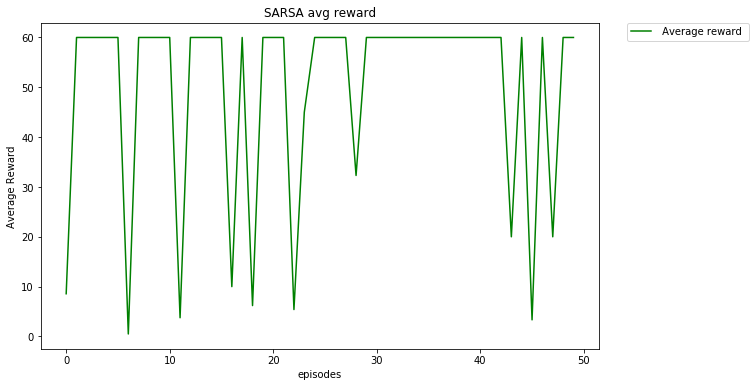

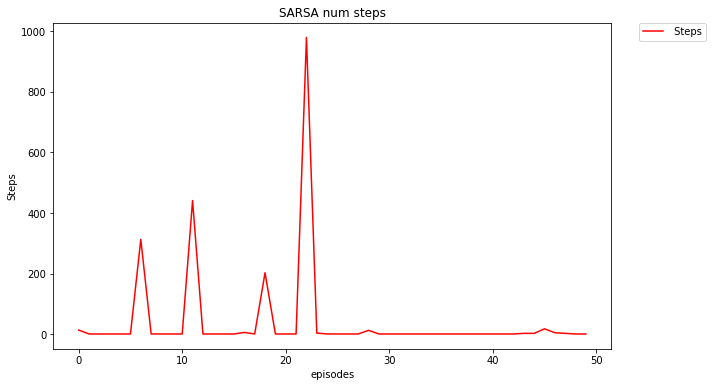

In [47]:
if __name__=='__main__':
    # parameters
    gamma = 0.9
    alpha = 0.01
    epsilon = 0.1
    episodes = 50
    
    avg_reward, steps, Q = SARSA(gamma,alpha,epsilon, episodes)
    plot_sarsa(avg_reward, steps, episodes)

In [48]:
Q.shape

(4, 12, 12)

In [50]:
np.argmax(Q, axis=0)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
env.reset()
env.current_position

In [ ]:
for i in range(12):
    for j in range(12):
        for act in range(4):
            pos = [i,j]
            Q[pos,act] = 0

In [ ]:
# Q = np.zeros((env.observation_space, env.action_space))
env.action_space.n

In [ ]:
env = gym.make('FrozenLake-v0')

In [ ]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

In [ ]:
Q

In [ ]:
from collections import defaultdict
q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
q_table[tuple([10,10]),4]

In [ ]:
q = np.zeros([tuple([12,12]),0]) 

In [ ]:
q = np.zeros([12,12,4])
q[11,11][2]

In [ ]:
q[2,11,11]
s = np.array([11,11])
print(s.shape)
s = np.squeeze(s,1)
print(s.shape)


In [25]:
Q = np.ones([4,12,12])
Q[1,11,11] = 5
Q[2,5,5] = 4
np.argmax(Q,axis=0)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])